In [1]:
import json
from collections import Counter 

FRICTION_CATEGORIES = [
    'Not Friction', 
    'Assumption Reveal', 
    'Probing',
    'Overspecification',
    'Reinforcement', 
    'Reflective Pause'
]

PFG_ACTS = [
    'logical-appeal',
    'emotion-appeal',
    'credibility-appeal',
    'foot-in-the-door',
    'self-modeling',
    'personal-story',
    'donation-information',
    'source-related-inquiry',
    'task-related-inquiry',
    'personal-related-inquiry',
]

MW_ACTS = [
    'recommend',
    'inform',
    'request',
    'select',
    'offerbook',
    'book',
    'offerbooked',
    'nobook',
    'nooffer'
]

TEACH_ACTS = [
    'Greetings/Salutations', 
    'RequestForInstruction', 
    'RequestForObjectLocationAndOtherDetails', 
    'RequestMore', 
    'RequestOtherInfo', 
    'InformationOther', 
    'NotifyFailure', 
    'Confirm', 
    'Acknowledge', 
    'OtherInterfaceComment', 
    'MiscOther', 
]



multiwoz_annos = json.load(open('data_new_prompt/multiwoz_friction_anno-450instances.json'))
pfg_annos = json.load(open('data_new_prompt/persuasionforgood_anno-488instances.json'))
teach_annos = json.load(open('data_new_prompt/teach_anno-550instances.json'))

multiwoz_actfriction_counter = Counter()
for d in multiwoz_annos:
    for a in d['dialogue_acts']:
        acttype = a.split('-')[-1].lower()
        if len(d['friction_anno']) > 20 or d['friction_anno'] not in FRICTION_CATEGORIES or acttype not in MW_ACTS:
            continue
        multiwoz_actfriction_counter[(acttype, d['friction_anno'])] += 1

pfg_actfriction_counter = Counter()
for d in pfg_annos:
    for a in set(d['dialogue_acts']):
        if a in PFG_ACTS and d['friction_anno'] in FRICTION_CATEGORIES:
            pfg_actfriction_counter[(a, d['friction_anno'])] += 1

teach_actfriction_counter = Counter()
for d in teach_annos:
    d['friction_anno'] = d['friction_anno'].strip('.')
    if d['friction_anno'] in FRICTION_CATEGORIES or d['dialog_act'] not in TEACH_ACTS:
        teach_actfriction_counter[(d['dialog_act'], d['friction_anno'])] += 1

In [2]:
PFG_ABBREV = {
    'logical-appeal': 'LA',
    'emotion-appeal': 'EA',
    'credibility-appeal': 'CA',
    'foot-in-the-door': 'FITD',
    'self-modeling': 'SM',
    'personal-story': 'PS',
    'donation-information': 'DI',
    'source-related-inquiry': 'SRI',
    'task-related-inquiry': 'TRI',
    'personal-related-inquiry': 'PRI',
}

MW_ABBREV = {
    'recommend': 'REC',
    'inform': 'INF',
    'request': 'REQ',
    'select': 'SEL',
    'offerbook': 'OBK',
    'book': 'BK',
    'offerbooked': 'OBKD',
    'nobook': 'NBK',
    'nooffer': 'NOF',
}

TEACH_ABBREV = {
    'Greetings/Salutations': 'G/S', 
    'RequestForInstruction': 'RFI', 
    'RequestForObjectLocationAndOtherDetails': 'RFOL', 
    'RequestMore': 'RFM', 
    'RequestOtherInfo': 'ROI', 
    'InformationOther': 'INFO', 
    'NotifyFailure': 'NF', 
    'Confirm': 'CONF', 
    'Acknowledge': 'ACK', 
    'OtherInterfaceComment': 'OIC', 
    'MiscOther': 'MISC', 
}
    

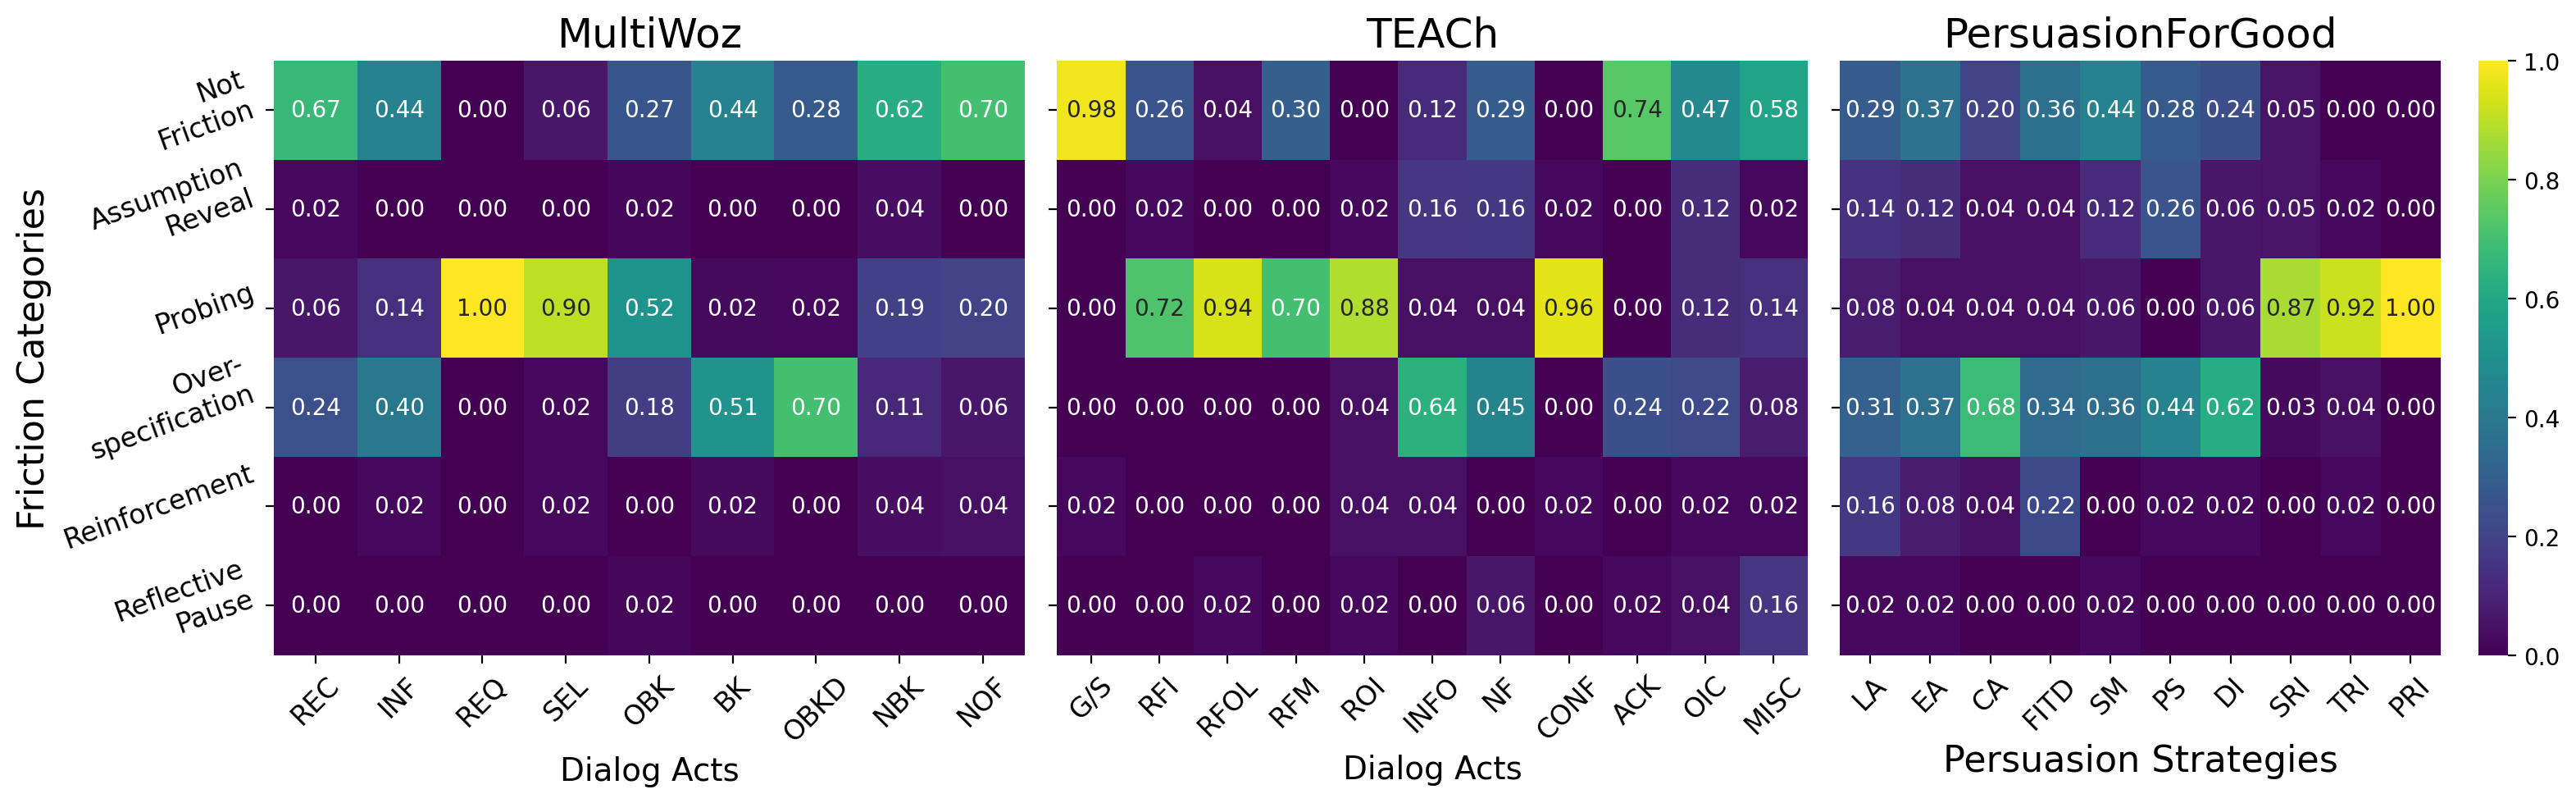

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(1, 3, figsize=(16, 5), dpi=200)

def print_friction_heatmap(data_dict, cols, title, ax, cbar_on=False):
    data = [[data_dict[(c, r)]/sum([data_dict[(c, r2)] for r2 in FRICTION_CATEGORIES]) for c in cols] for r in FRICTION_CATEGORIES]
    df = pd.DataFrame(data)#, index=rows, columns=cols)
    sns.heatmap(df, annot=True, fmt='.2f', cmap='viridis', ax=ax, cbar=cbar_on, vmin=0, vmax=1)
    ax.set_title(title, fontsize=18)
    friction_categories_displayed = [x.replace(' ', '\n') for x in FRICTION_CATEGORIES]
    friction_categories_displayed[friction_categories_displayed.index('Overspecification')] = 'Over-\nspecification'
    ax.set_yticklabels(friction_categories_displayed, rotation=20, fontsize=12)
    ax.set_xticklabels([MW_ABBREV.get(c, PFG_ABBREV.get(c, TEACH_ABBREV.get(c, c))) for c in cols], rotation=45, fontsize=12)
    ax.set_xlabel('Dialog Acts', fontsize=14)

print_friction_heatmap(multiwoz_actfriction_counter, MW_ACTS, 'MultiWoz', ax[0])
print_friction_heatmap(teach_actfriction_counter, TEACH_ACTS, 'TEACh', ax[1])
print_friction_heatmap(pfg_actfriction_counter, PFG_ACTS, 'PersuasionForGood', ax[2], True)
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[2].set_xlabel('Persuasion Strategies', fontsize=16)
ax[0].set_ylabel('Friction Categories', fontsize=16)

plt.tight_layout()
plt.show()
